In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('C:/Users/admin/Downloads/LetsUpgade/Coding files/Day 24 (Decision Tree and Random Forest)/titanic_eda/train.csv', index_col='PassengerId')
test = pd.read_csv('C:/Users/admin/Downloads/LetsUpgade/Coding files/Day 24 (Decision Tree and Random Forest)/titanic_eda/test.csv',index_col='PassengerId')

In [3]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [4]:
train.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [8]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Leitch, Miss. Jessie Wills",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Cabin,204,147,C23 C25 C27,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Filling the Missing values of Cabin

In [10]:
# Filling the NaN values with the new category "Missing"
train = train.fillna('Missing', axis=1)

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Missing,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Missing,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Missing,S


### Handle the Categorical columns

In [12]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          89
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       148
Embarked      4
dtype: int64

In [13]:
train['Cabin'] = train['Cabin'].astype('str').str[0]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S


In [14]:
ordinal_cabin = train.groupby(['Cabin'])['Survived'].mean().sort_values().index


ordinal_cabin_dict = {k:i for i,k in enumerate(ordinal_cabin, 0)}
ordinal_cabin_dict

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [15]:
train['Cabin'] = train['Cabin'].map(ordinal_cabin_dict)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,4,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,1,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,1,S


In [16]:
# Apply OneHotEncoding on "Sex" and "Embarked" features
train_onehot = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train, train_onehot], axis=1)
train['Sex_M'] = np.where(train.Sex == 'male', 1,0)

In [17]:
train_onehot = pd.get_dummies(train, columns=['Sex','Embarked'],drop_first=True )

In [18]:
train.drop(['Sex', 'Embarked'], axis=1, inplace= True)

In [19]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Missing,Q,S,Sex_M
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,0,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,4,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,4,0,0,1,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,1,0,0,1,1


In [20]:
train = train.drop(['Name', 'Ticket','Fare', 'Age','Missing'], axis=1)

In [21]:
test = test.drop(['Name', 'Sex', 'Embarked','Ticket','Fare'], axis=1)

In [22]:
train.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Q', 'S', 'Sex_M'], dtype='object')

In [23]:
train.columns = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked_Q',
       'Embarked_S', 'Sex_M']

In [24]:
train.head()

,Survived,Pclass,SibSp,Parch,Cabin,Embarked_Q,Embarked_S,Sex_M
PassengerId,,,,,,,,
1,0,3,1,0,1,0,1,1
2,1,1,1,0,4,0,0,0
3,1,3,0,0,1,0,1,0
4,1,1,1,0,4,0,1,0
5,0,3,0,0,1,0,1,1


## Built a Model for k-NN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, accuracy_score

__Function to train model for k-Nearest Neighbors (Classifier) and get Accuracy score with Confusion matrix for Different "k"(n_neighbor) values.__

In [26]:
def kmodel(train, test):
    acc_score = []
    x_train, x_test, y_train, y_test = train_test_split(train, test, test_size= 0.3, random_state=0)
    for i in range(1,len(x_test)):    
        knn = KNeighborsClassifier(n_neighbors=i)
        y_pred = knn.fit(x_train, y_train).predict(x_test)
        score = accuracy_score(y_pred, y_test)
        acc_score.append(score)
    return acc_score

### Model for Dependent variable is "Pclass" and remaning as Independent variables

In [27]:
test_pclass = train['Pclass']
train_pclass = train.drop(['Pclass'], axis=1)

In [28]:
score =kmodel(train_pclass, test_pclass)

In [29]:
val = np.arange(1,286)
val = pd.DataFrame(val, columns=['n_neighbors'])
acc = pd.DataFrame(score, columns=['Score'])
knn_score = pd.concat([val, acc], axis=1)
knn_score.head()


,n_neighbors,Score
0,1,0.720149
1,2,0.667910
2,3,0.675373
3,4,0.708955
4,5,0.738806


In [30]:
knn_score=knn_score.set_index('n_neighbors')

In [31]:
top_10_score = knn_score.sort_values(['Score'],ascending=False, axis=0).head(10)

top_10_score.head()

,Score
n_neighbors,
54,0.753731
27,0.750000
53,0.750000
36,0.746269
52,0.746269


__Plot a graph for top 10 Score of k-NN model with n-neighbors used.__

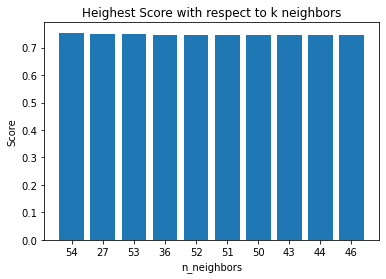

In [39]:
heig = [1,2,3,4,5,6,7,8,9,10]
plt.bar(heig,height=top_10_score.Score.values,tick_label= top_10_score.index)
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('Heighest Score with respect to k neighbors')
plt.show()

__So, for "K" values as '54' gives highest accuracy for k-NN model.__